In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import string
import re

In [2]:
full_df = pd.read_csv('chicago_crimeV1.csv')
full_df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,DateOnly,Time,Street Name,MilitaryTime
0,10224738,HY411648,09/05/2015 01:30:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,08B,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,09/05/2015,01:30:00 PM,WOOD,1330
1,10224739,HY411615,09/04/2015 11:30:00 AM,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,06,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,09/04/2015,11:30:00 AM,CENTRAL,1130
2,10224740,HY411595,09/05/2015 12:45:00 PM,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,18,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,09/05/2015,12:45:00 PM,BARRY,45
3,10224741,HY411610,09/05/2015 01:00:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,08A,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,09/05/2015,01:00:00 PM,LARAMIE,1300
4,10224742,HY411435,09/05/2015 10:55:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,05,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,09/05/2015,10:55:00 AM,LOOMIS,1055


In [3]:
full_df.isnull().sum()

ID                         0
Case Number                3
Date                       0
IUCR                       0
Primary Type               0
Description                0
Location Description    5455
Arrest                     0
Domestic                   0
Beat                       0
District                  47
FBI Code                   0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
DateOnly                   0
Time                       0
Street Name                3
MilitaryTime               0
dtype: int64

In [3]:
full_df.dropna(subset=['Case Number','Location Description','District','Street Name'],inplace=True)
full_df.isnull().sum()

ID                      0
Case Number             0
Date                    0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
Year                    0
Updated On              0
Latitude                0
Longitude               0
DateOnly                0
Time                    0
Street Name             0
MilitaryTime            0
dtype: int64

In [4]:
full_df = full_df[full_df['Primary Type'] != 'DOMESTIC VIOLENCE']
full_df['Primary Type'].value_counts()

THEFT                                1529604
BATTERY                              1343099
CRIMINAL DAMAGE                       834407
NARCOTICS                             727998
ASSAULT                               467532
OTHER OFFENSE                         454027
BURGLARY                              409119
MOTOR VEHICLE THEFT                   336006
DECEPTIVE PRACTICE                    295394
ROBBERY                               274686
CRIMINAL TRESPASS                     205848
WEAPONS VIOLATION                      90352
PROSTITUTION                           68742
PUBLIC PEACE VIOLATION                 50827
OFFENSE INVOLVING CHILDREN             48573
SEX OFFENSE                            26757
CRIM SEXUAL ASSAULT                    26383
INTERFERENCE WITH PUBLIC OFFICER       17596
GAMBLING                               14503
LIQUOR LAW VIOLATION                   14390
ARSON                                  12339
HOMICIDE                               11194
KIDNAPPING

In [5]:
def no_punc(text):
    no_punc = []
    for char in text:
        if char in string.punctuation:
            no_punc.append(' ')
        else:
            no_punc.append(char)
    return ''.join(no_punc)
    

full_df['Description'] = full_df['Description'].apply(lambda x: no_punc(x))
full_df['Location Description'] = full_df['Location Description'].apply(lambda x: no_punc(x))
full_df['Street Name'] = full_df['Street Name'].apply(lambda x: no_punc(x))
full_df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,DateOnly,Time,Street Name,MilitaryTime
0,10224738,HY411648,09/05/2015 01:30:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,08B,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,09/05/2015,01:30:00 PM,WOOD,1330
1,10224739,HY411615,09/04/2015 11:30:00 AM,0870,THEFT,POCKET PICKING,CTA BUS,False,False,1511,15.0,06,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,09/04/2015,11:30:00 AM,CENTRAL,1130
2,10224740,HY411595,09/05/2015 12:45:00 PM,2023,NARCOTICS,POSS HEROIN BRN TAN,SIDEWALK,True,False,1412,14.0,18,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,09/05/2015,12:45:00 PM,BARRY,45
3,10224741,HY411610,09/05/2015 01:00:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,08A,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,09/05/2015,01:00:00 PM,LARAMIE,1300
4,10224742,HY411435,09/05/2015 10:55:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,05,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,09/05/2015,10:55:00 AM,LOOMIS,1055


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
full_df['Domestic'] = le.fit_transform(full_df['Domestic'])
full_df['Arrest'] = le.fit_transform(full_df['Arrest'])
full_df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,DateOnly,Time,Street Name,MilitaryTime
0,10224738,HY411648,09/05/2015 01:30:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,08B,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,09/05/2015,01:30:00 PM,WOOD,1330
1,10224739,HY411615,09/04/2015 11:30:00 AM,0870,THEFT,POCKET PICKING,CTA BUS,0,0,1511,15.0,06,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,09/04/2015,11:30:00 AM,CENTRAL,1130
2,10224740,HY411595,09/05/2015 12:45:00 PM,2023,NARCOTICS,POSS HEROIN BRN TAN,SIDEWALK,1,0,1412,14.0,18,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,09/05/2015,12:45:00 PM,BARRY,45
3,10224741,HY411610,09/05/2015 01:00:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,08A,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,09/05/2015,01:00:00 PM,LARAMIE,1300
4,10224742,HY411435,09/05/2015 10:55:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,0,0,614,6.0,05,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,09/05/2015,10:55:00 AM,LOOMIS,1055


In [7]:
full_df['str_domestic'] = full_df['Domestic'].apply(lambda x: str(x))

full_df['aggregate'] = full_df['Primary Type'] + ' '
print(full_df['aggregate'].head())
full_df['aggregate'] = full_df['aggregate'] + full_df['Description'] + ' '
print(full_df['aggregate'].head())
full_df['aggregate'] = full_df['aggregate'] + full_df['Location Description'] + ' '
print(full_df['aggregate'].head())
full_df['aggregate'] = full_df['aggregate'] + 'DOM_' + full_df['str_domestic'] + ' '
print(full_df['aggregate'].head())

0      BATTERY 
1        THEFT 
2    NARCOTICS 
3      ASSAULT 
4     BURGLARY 
Name: aggregate, dtype: object
0    BATTERY DOMESTIC BATTERY SIMPLE 
1               THEFT POCKET PICKING 
2    NARCOTICS POSS  HEROIN BRN TAN  
3                     ASSAULT SIMPLE 
4            BURGLARY FORCIBLE ENTRY 
Name: aggregate, dtype: object
0    BATTERY DOMESTIC BATTERY SIMPLE RESIDENCE 
1                 THEFT POCKET PICKING CTA BUS 
2     NARCOTICS POSS  HEROIN BRN TAN  SIDEWALK 
3                     ASSAULT SIMPLE APARTMENT 
4            BURGLARY FORCIBLE ENTRY RESIDENCE 
Name: aggregate, dtype: object
0    BATTERY DOMESTIC BATTERY SIMPLE RESIDENCE DOM_1 
1                 THEFT POCKET PICKING CTA BUS DOM_0 
2     NARCOTICS POSS  HEROIN BRN TAN  SIDEWALK DOM_0 
3                     ASSAULT SIMPLE APARTMENT DOM_1 
4            BURGLARY FORCIBLE ENTRY RESIDENCE DOM_0 
Name: aggregate, dtype: object


In [8]:
from sklearn.model_selection import train_test_split

X = full_df['aggregate']
y = full_df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train

6185767         THEFT RETAIL THEFT SMALL RETAIL STORE DOM_0 
6015684    NARCOTICS POSS  CANNABIS 30GMS OR LESS STREET ...
6258857         THEFT RETAIL THEFT GROCERY FOOD STORE DOM_0 
3550396    THEFT  500 AND UNDER VEHICLE NON COMMERCIAL DO...
2628253           NARCOTICS MANU DELIVER CRACK STREET DOM_0 
                                 ...                        
4721268             BURGLARY FORCIBLE ENTRY APARTMENT DOM_0 
561204     CRIMINAL DAMAGE TO CITY OF CHICAGO PROPERTY CT...
940608       OTHER OFFENSE TELEPHONE THREAT RESIDENCE DOM_1 
6464890    DECEPTIVE PRACTICE FINANCIAL IDENTITY THEFT OV...
3512140         CRIMINAL DAMAGE TO PROPERTY RESIDENCE DOM_1 
Name: aggregate, Length: 4877386, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_counts = vect.fit_transform(X_train)
print(X_counts.shape)
print(vect.get_feature_names())

(4877386, 694)
['10', '10gm', '18', '30', '300', '30gms', '500', 'abandoned', 'abandonment', 'abduction', 'abuse', 'act', 'action', 'acts', 'add', 'address', 'adult', 'adultry', 'advertise', 'against', 'age', 'agg', 'aggravated', 'aid', 'aiding', 'air', 'aircraft', 'airport', 'alarm', 'alike', 'alley', 'alter', 'altered', 'ammo', 'ammunition', 'amphetamines', 'amusement', 'an', 'and', 'animal', 'annual', 'apartment', 'app', 'appliance', 'area', 'arena', 'arm', 'armed', 'armor', 'arrestee', 'arson', 'arsonist', 'assault', 'asslt', 'at', 'athletic', 'atm', 'ats', 'att', 'attempt', 'auto', 'automatic', 'automobile', 'back', 'bail', 'ban', 'bank', 'banquet', 'bar', 'barber', 'barbershop', 'barbituates', 'barbiturates', 'basement', 'battery', 'beauty', 'bigamist', 'bigamy', 'bike', 'black', 'board', 'boat', 'body', 'bogus', 'boli', 'bolita', 'bomb', 'bond', 'bookmaking', 'bowling', 'bribery', 'bridge', 'brn', 'brown', 'building', 'bullets', 'burglary', 'bus', 'business', 'buy', 'by', 'cab',

In [11]:
X_vect_df = pd.DataFrame(X_counts.toarray())
#col_names = []
#for col in col_names:
#  col_names.append('desc_' + col)
#desc_vect_df.columns = col_names
#desc_vect_df.head()

In [12]:
X_vect_df.columns = vect.get_feature_names()
X_vect_df.head()

,10,10gm,18,30,300,30gms,500,abandoned,abandonment,abduction,...,while,white,wireroom,with,wooded,worship,writer,yard,ymca,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test_counts = vect.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_counts,y_train)

RandomForestClassifier(n_jobs=-1)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test_counts)
accuracy_score(y_test,y_pred)

0.8857476347627437

In [16]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(rfc, X_counts, y_train, cv=3))

[0.88564801 0.8853687  0.88563134]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
with open('rfc.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93   1753182
           1       0.91      0.64      0.75    649114

    accuracy                           0.89   2402296
   macro avg       0.89      0.81      0.84   2402296
weighted avg       0.89      0.89      0.88   2402296

[[1709386   43796]
 [ 230672  418442]]


In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_counts, y_train)

MultinomialNB()

In [19]:
y_pred = nb.predict(X_test_counts)
accuracy_score(y_test,y_pred)

0.8719695657820685

In [20]:
print(cross_val_score(nb, X_counts, y_train, cv=3))

[0.87181418 0.87149917 0.87195065]


In [22]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
with open('nb.pickle', 'wb') as handle:
    pickle.dump(nb, handle, protocol=pickle.HIGHEST_PROTOCOL)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92   1753182
           1       0.86      0.63      0.73    649114

    accuracy                           0.87   2402296
   macro avg       0.87      0.80      0.82   2402296
weighted avg       0.87      0.87      0.87   2402296

[[1684158   69024]
 [ 238543  410571]]


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [2, 3, 4, 5, 6,7,8],
              "max_features": [2,5,9,13,17],
              "min_samples_split": [2,5,9,13,17],
              "criterion": ["gini", "entropy"]}
grid_search_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search_rfc.fit(X_counts, y_train)
print("Best score:", round((grid_search_rfc.best_score_),3))
print("Best params:", grid_search_rfc.best_params_)

with open('grid_rfc.pickle', 'wb') as handle:
    pickle.dump(grid_search_rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

KeyboardInterrupt: 

In [ ]:
rfc.get_params()

In [ ]:
param_grid = {'alpha': [0,2,4,6,8,10]}
grid_search_nb = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search_nb.fit(X_counts, y_train)
print("Best score:", round((grid_search_nb.best_score_),3))
print("Best params:", grid_search_nb.best_params_)

with open('grid_nb.pickle', 'wb') as handle:
    pickle.dump(grid_search_nb, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_counts, y_train)

In [26]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title= 'title'):
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    ax.plot([0,1],[0,1],linestyle='--', label='Random guess')
    ax.plot(fpr, tpr, marker='.', label='ROC - Area Under The Curve: %3f' % AUC_ROC)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.legend();

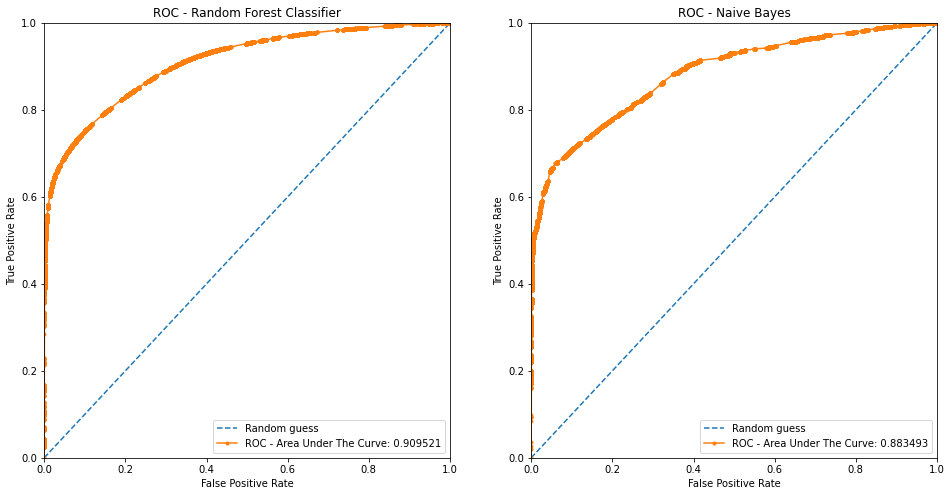

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

rfc_prob = rfc.predict_proba(X_test_counts)
nb_prob = nb.predict_proba(X_test_counts)
plot_rocs(y_test, rfc_prob, roc_auc_score(y_test, rfc_prob[:,1]),
         ax[0], 'ROC - Random Forest Classifier')
plot_rocs(y_test, nb_prob, roc_auc_score(y_test, nb_prob[:,1]),
         ax[1], 'ROC - Naive Bayes')

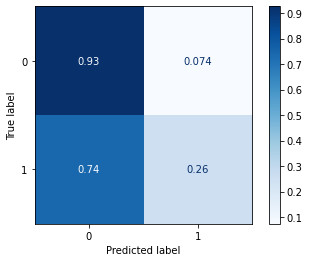

In [12]:
from sklearn.metrics import plot_confusion_matrix

rfc = pickle.load(open('rfc.pickle', 'rb'))
plot_confusion_matrix(rfc,X_test_counts,y_test,cmap=plt.cm.Blues,normalize='true')

In [13]:
nb = pickle.load(open('nb.pickle', 'rb'))
plot_confusion_matrix(nb,X_test_counts,y_test,cmap=plt.cm.Blues,normalize='true')

/Users/williamcollins/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


ValueError: dimension mismatch